                                        Intelligence Analytics Challenge 4.0

Team Name: Team A

Team Members: Shilpa Parameshwara Bhat, Meghana Koteshwara Prahlad
              
University: The University of Texas at Dallas

#### Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import warnings

#### Importing and understanding data

In [2]:
data = pd.read_excel('data_inuse.xlsx', sheet_name='budget.tsv')

In [3]:
print(data.columns)

Index(['movie_id', 'title', 'plot', 'movie_rating', 'movie_rating.1',
       'metacritic', 'dvd_release', 'production', 'actors', 'movie_votes',
       'poster', 'director', 'release_date', 'runtime', 'genre', 'awards',
       'keywords', 'Budget', 'Box Office Gross'],
      dtype='object')


In [4]:
data.head(1)

,movie_id,title,plot,movie_rating,movie_rating.1,metacritic,dvd_release,production,actors,movie_votes,poster,director,release_date,runtime,genre,awards,keywords,Budget,Box Office Gross
0,tt0010323,The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,NaN,1997-10-15,Rialto Pictures,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",42583.0,https://images-na.ssl-images-amazon.com/images...,Robert Wiene,1921-03-19,67 min,"Fantasy, Horror, Mystery",1 nomination.,expressionism|somnambulist|avant-garde|hypnosi...,18000,0


In [5]:
rows, col = data.shape
print('We have {} rows and {} features'.format(rows-1, col))

We have 8467 rows and 19 features


In [6]:
data.info()
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 19 columns):
movie_id            8468 non-null object
title               8468 non-null object
plot                8196 non-null object
movie_rating        5252 non-null object
movie_rating.1      7735 non-null float64
metacritic          5079 non-null float64
dvd_release         5335 non-null datetime64[ns]
production          6758 non-null object
actors              8153 non-null object
movie_votes         7735 non-null float64
poster              7967 non-null object
director            8390 non-null object
release_date        8283 non-null datetime64[ns]
runtime             7846 non-null object
genre               8424 non-null object
awards              5242 non-null object
keywords            6381 non-null object
Budget              8468 non-null object
Box Office Gross    8468 non-null object
dtypes: datetime64[ns](2), float64(3), object(14)
memory usage: 1.2+ MB


#### Data Cleaning

In [7]:
delete = [ 'movie_id','production', 'poster', 'metacritic','movie_rating','awards', 'dvd_release']
movie = data.drop(delete, 1)
movie.head(1)

,title,plot,movie_rating.1,actors,movie_votes,director,release_date,runtime,genre,keywords,Budget,Box Office Gross
0,The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",42583.0,Robert Wiene,1921-03-19,67 min,"Fantasy, Horror, Mystery",expressionism|somnambulist|avant-garde|hypnosi...,18000,0


In [8]:
movie.rename(columns = {'Box Office Gross' : 'Revenue','movie_rating.1' : 'movie_rating'}, inplace = True)

In [9]:
a = ['Budget','Revenue','runtime', 'movie_rating']
movie[a] = movie[a].replace(0, np.NaN)
movie.dropna(subset = a, inplace = True)
rows, col = movie.shape
print('Now have only {} rows'.format(rows-1))

Now have only 2612 rows


In [10]:
movie['runtime'] = movie['runtime'].str.replace(' min','')

In [11]:
movie['Revenue'] = pd.to_numeric(movie['Revenue'], errors='coerce')
movie['Budget'] = pd.to_numeric(movie['Budget'], errors='coerce')
movie['runtime'] = pd.to_numeric(movie['runtime'], errors='coerce')
movie.release_date = pd.to_datetime(movie['release_date'])

In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 2 to 8460
Data columns (total 12 columns):
title           2613 non-null object
plot            2612 non-null object
movie_rating    2613 non-null float64
actors          2606 non-null object
movie_votes     2613 non-null float64
director        2612 non-null object
release_date    2609 non-null datetime64[ns]
runtime         2613 non-null int64
genre           2613 non-null object
keywords        2540 non-null object
Budget          2613 non-null int64
Revenue         2600 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 265.4+ KB


In [13]:
movie['Profit'] = movie['Revenue'] - movie['Budget']

In [14]:
movie.dropna(inplace= True)
rows, col = movie.shape
print('Now have only {} rows'.format(rows-1))

Now have only 2518 rows


In [15]:
profit_data = movie[movie['Profit'] > 10000000]

In [16]:
rows, col = profit_data.shape
print('Now have only {} rows'.format(rows-1))

Now have only 808 rows


### 1. Why do some small budget films become blockbuster hits? Alternatively, why do some large budget films fail?

Here we are defining the logic to consider movie to be low, medium and high budget. we are doing that based on the distrubution of the budget available in the data

Blockbuster tag is created basis two logic
If keyword contains term **blockbuster** or if the **Revenue is 2.75 times the budget** (As per definition of blockbuster 2.5 times budget and marketing, since we don't know marketing cost we have considered 2.5)

In [17]:
a = movie['Budget'].describe()[3:8]
bins = [a[0],a[2],a[3],a[4]]
labels = ['Low', 'Medium', 'High']
movie['Budget_dcd'] = pd.cut(movie.Budget, bins, labels = labels,include_lowest = True)

In [18]:
movie['blockbuster1'] = np.where(movie['Profit'] >= 2.75*movie['Budget'], 'Y','N')
movie['blockbuster']= np.where(movie['keywords'].str.contains("blockbuster"), 'Y','N')
movie['blockbuster_tag'] = np.where((movie["blockbuster1"] == 'Y') | (movie["blockbuster"] == 'Y'), 'Y','N')

In [19]:
movie_bb = movie[movie["blockbuster_tag"] == 'Y']

In [20]:
movie["Budget_dcd"].value_counts()

Low       1279
Medium     634
High       606
Name: Budget_dcd, dtype: int64

In [21]:
movie_bb["Budget_dcd"].value_counts()

Low       207
High      125
Medium     57
Name: Budget_dcd, dtype: int64

In [22]:
125/606

0.20627062706270627

In [23]:
207/1279

0.16184519155590305

##### 16% of the Low budget movie are blockbuster and 20% of High Budget movie are blockbuster hits. Though the percentage of high budget movie becoming blockbuster hit is not significantly high. We can't conclude that buget is the reason for a movie to fail or become block buster

### 2. How do movies fare in terms of genre? Comedy, science fiction?

##### Defining function to get the value counts of a column which has data seperated by some sort of sep(',' , '|')

In [24]:
def extractdatawithsep(data, col, sep):
    string = data[col]
    a = string.replace(' ','').str.cat(sep = sep)
    b = pd.Series(a.split(sep)).str.strip()
    count = b.value_counts(ascending=False)
    return count

In [73]:
def plot(title):
    summary.sort_values(ascending=True,inplace=True)
    plot = summary.plot.barh(color = 'black', fontsize = 10)
    plot.set(title = title)
    plot.set_xlabel('Number of Movies', color = 'black', fontsize = '10')
    plt.gcf().set_size_inches(15,12)
    plt.show()

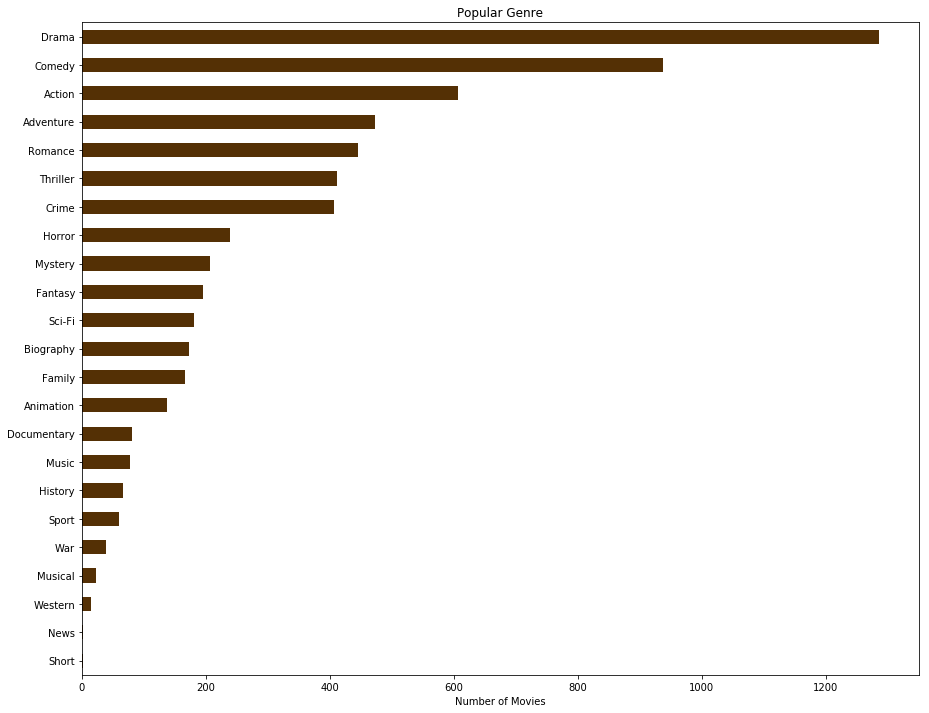

In [74]:
summary = extractdatawithsep(movie,'genre', ',')
plot('Popular Genre')

#### The above bar graph we can tell Drama is the top genre followed by comedy, action etc.

 ### 3. How well do you think that remakes, tent-poles and sequels perform?

##### Here we have checked if keywords contain remakes, tent-poles or sequels and tagged them respectively and all others are considered as originals

In [27]:
movie['keywords'].fillna('NA', inplace=True)

In [28]:
movie['kflag']= np.where(movie['keywords'].str.contains("remake"), 'remake',
                              np.where(movie['keywords'].str.contains("sequel"), 'sequel',
                              np.where(movie['keywords'].str.contains("tent-pole"), 'tent-pole', 'Original')))

In [29]:
movie.kflag.unique()

array(['Original', 'remake', 'sequel'], dtype=object)

In [30]:
movie['kflag'].value_counts()

Original    2076
sequel       271
remake       172
Name: kflag, dtype: int64

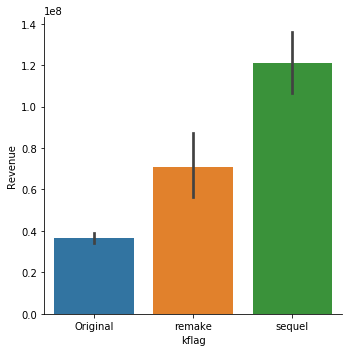

In [31]:
sns.catplot(x='kflag',y='Revenue',kind="bar",data=movie)

#### To check how remakes,tent-poles and sequence perform, it is been compared with revenue. 
#### From the above graph we can conclude that sequel makes the highest revenue then remake and followed by all others

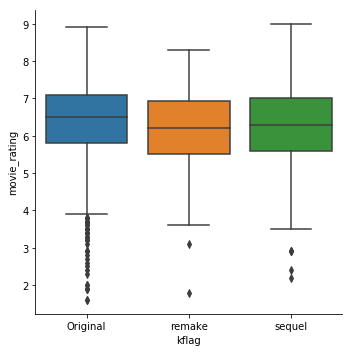

In [32]:
sns.catplot(x="kflag", y="movie_rating", kind="box",data=movie)

#### Further we have compared with the ratings, rating of originals is high compared to sequel or remakes

### 4. Does release date influence box office performance? Do movies released at the same time perform differently?

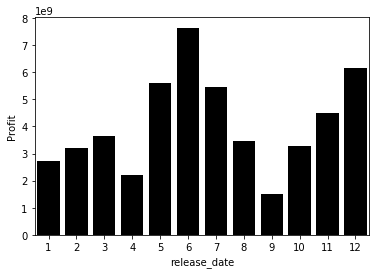

In [33]:
index_date = profit_data.set_index('release_date')
month = index_date.groupby(index_date.index.month)
monthly_profit = month['Profit'].sum()
monthly_profit = pd.DataFrame(monthly_profit)
sns.barplot(x = monthly_profit.index, y = monthly_profit['Profit'],color = 'black', data = monthly_profit)

#### The above graph shows us that movies released in June have most profits followed by December and May. The high profits during May, June and July coincides with the Summer Break in most places and  Christmas holidays during November and December. Basically releasing movie in a holiday season is profitable

### 5. If you were building a model to predict profitability of a movie at the box office. Which key variables would you consider? Bring out the relationships of these variables and their effect on profitability of a movie. Once you have studied the various relationships and have a robust model, what kind of model would you advise to a movie distributor on how he can maximize profit? 

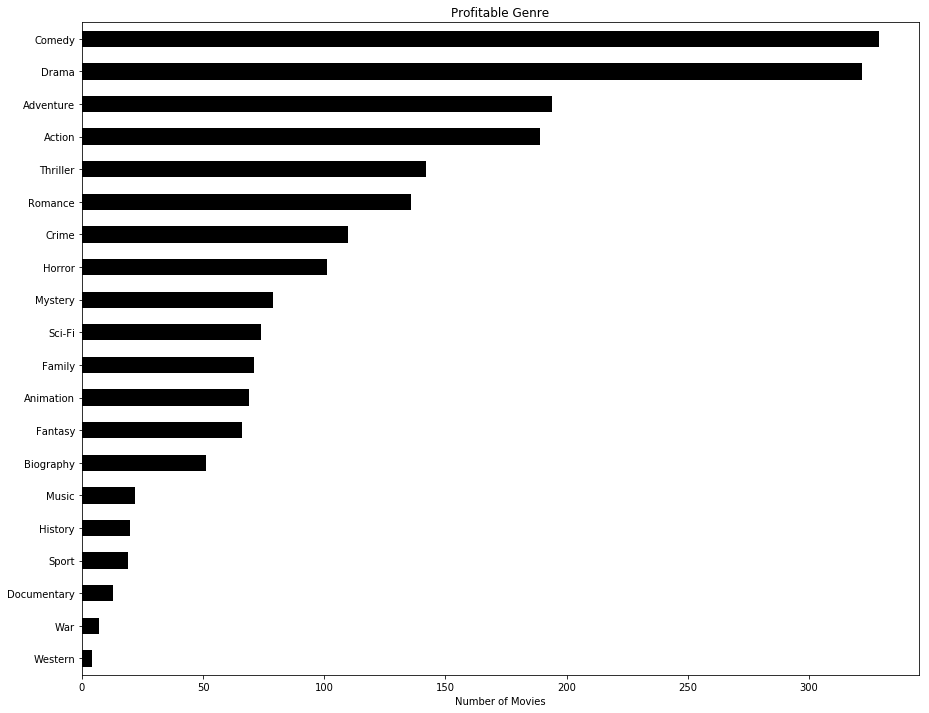

In [34]:
summary =extractdatawithsep(profit_data,'genre', ',')[:20]
plot('Profitable Genre')

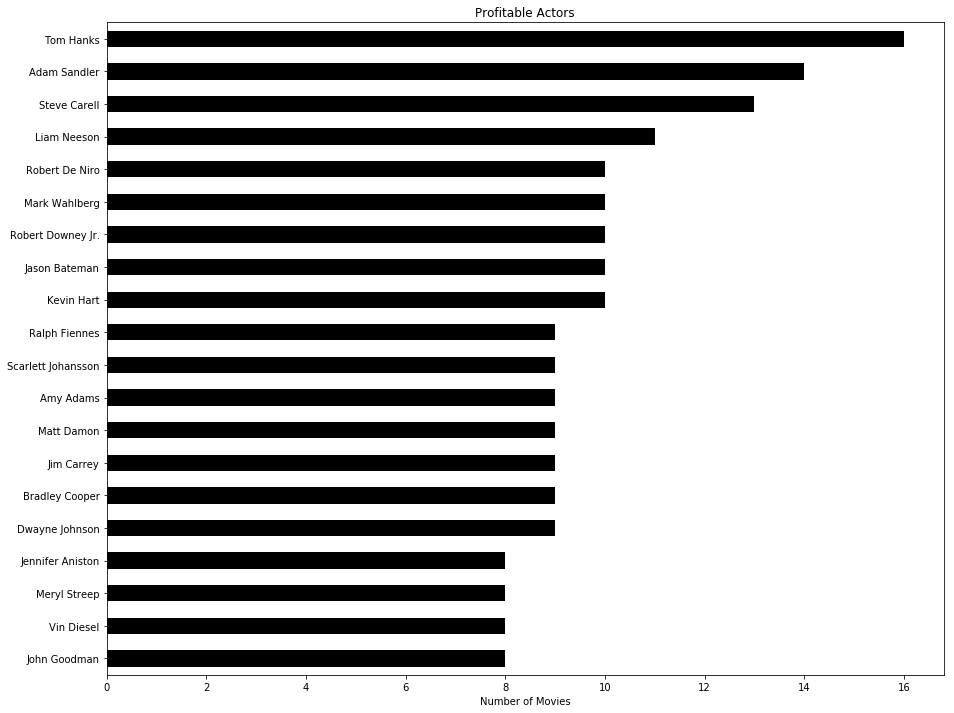

In [35]:
summary =extractdatawithsep(profit_data,'actors', ',')[:20]
plot('Profitable Actors')

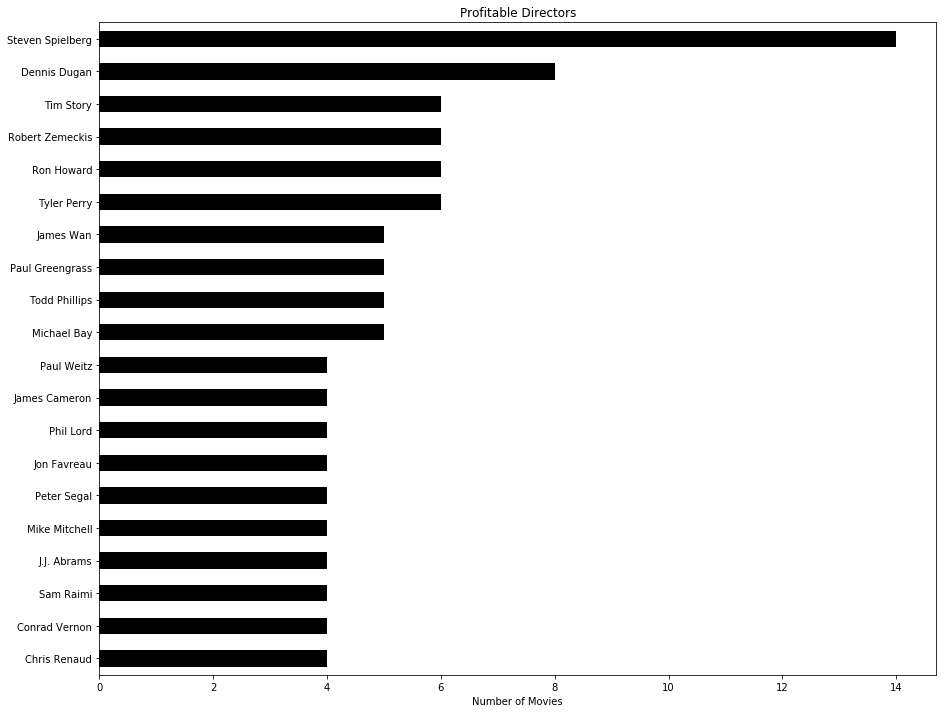

In [36]:
summary =extractdatawithsep(profit_data,'director', ',')[:20]
plot('Profitable Directors')

In [37]:
profit_data.runtime.mean()

110.54758961681088

In [38]:
profit_data.Budget.mean()

49024555.00618047

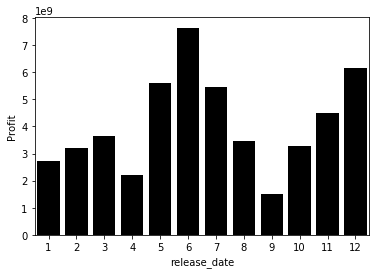

In [39]:
index_date = profit_data.set_index('release_date')
month = index_date.groupby(index_date.index.month)
monthly_revenue = month['Profit'].sum()
monthly_revenue = pd.DataFrame(monthly_revenue)
sns.barplot(x = monthly_revenue.index, y = monthly_revenue['Profit'],color = 'black', data = monthly_revenue)

#### For a movie to be profitable, here we have considered profit data (movies with atleast 10M profit)
#### The movie genre must be one of these, Comedy, drama, adventure, action.
#### The movie should be directed by any of these: Steven Spielberg, Dennis Dugan, Robert Zemeckis, Tim Story, Ron Howard,Tyler Perry
#### The movie must have any of these actors: Tom Hanks, Adam Sandler, Steve Carell, Liam Neeson
#### Average runtime should be 110 mins
#### Average budget should be 50M
#### Movie must be released in holiday season i.e June or December 

### 6. Does rating of a movie have any effect on movie earnings?

In [40]:
a = movie['Revenue'].describe()[3:8]
bins = [a[0],a[2],a[3],a[4]]
labels = ['Low', 'Medium', 'High']
movie['Revenue_dcd'] = pd.cut(movie.Revenue, bins, labels = labels,include_lowest = True)

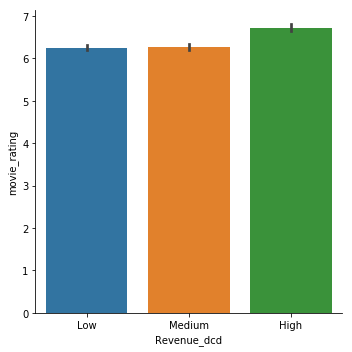

In [41]:
sns.catplot(x='Revenue_dcd',y='movie_rating',kind="bar",data=movie)

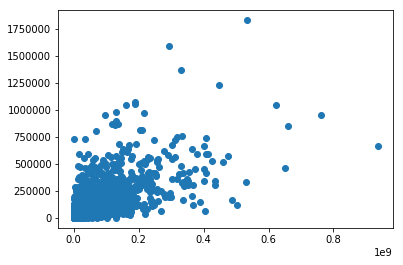

In [42]:
plt.scatter(movie['Revenue'], movie['movie_votes'])

#### From the above two graph we can conclude that higher the rating higher the eranings

### 7. If you are running a movie production house, which Actor(s)/Director would you like to cast in your movie

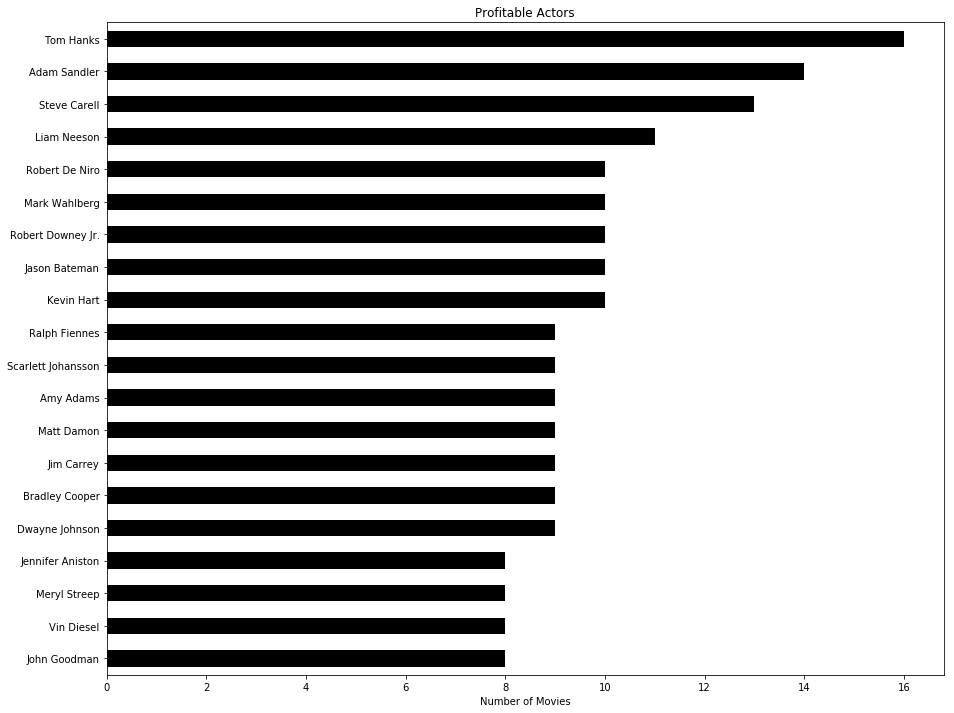

In [43]:
summary = extractdatawithsep(profit_data,'actors', ',')[:20]
plot('Profitable Actors')

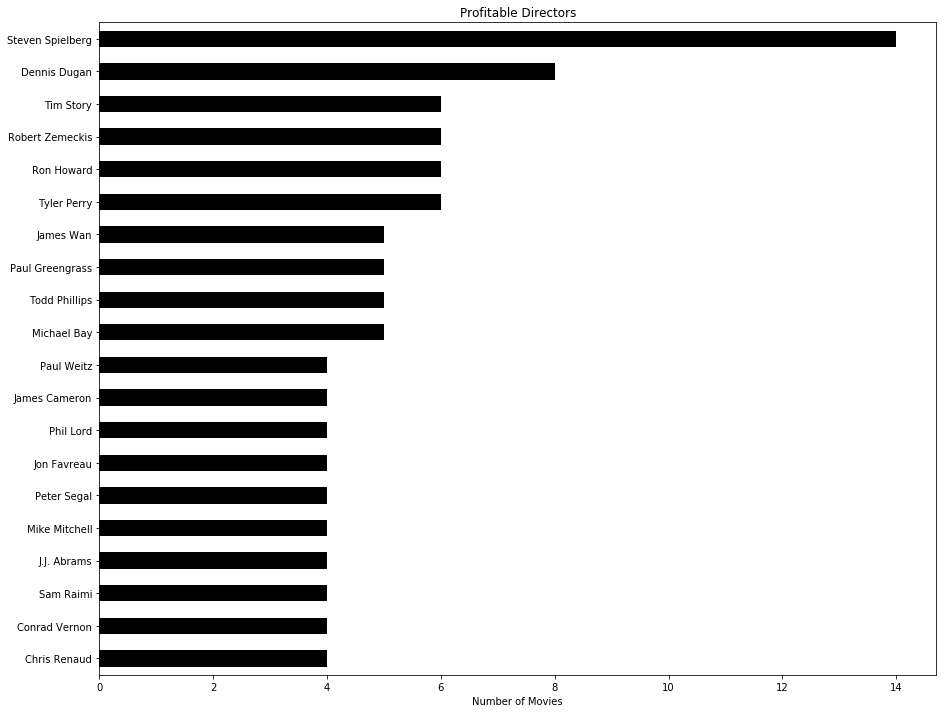

In [44]:
summary = extractdatawithsep(profit_data,'director', ',')[:20]
plot('Profitable Directors')

#### If we were running the production house then we would have picked the following directors: Steven Spielberg, Dennis Dugan, Robert Zemeckis, Tim Story, Ron Howard,Tyler Perry and the following actors:The movie must have any of these actors: Tom Hanks, Adam Sandler, Steve Carell, Liam Neeson

### 8. Does a plot of a movie affect its earnings in any way?

In [45]:
def avg_word(sentence):
    words = sentence.split()
    return (len(words))

def get_count(data):
    data['word'] = data['plot'].apply(lambda x: avg_word(x))
    stop = stopwords.words('english')
    data['stopwords'] = data['plot'].apply(lambda x: len([x for x in x.split() if x in stop]))
    data['words'] = data['word']-data['stopwords']
    

In [46]:
get_count(movie)
get_count(profit_data)

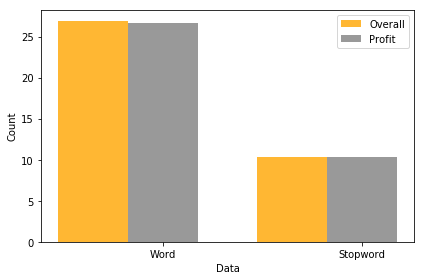

In [47]:
n_groups = 2
overall = (movie.word.mean(),movie.stopwords.mean() )
profit = (profit_data.word.mean(), profit_data.stopwords.mean())
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, overall, bar_width,alpha=opacity,color='orange',label='Overall')
rects2 = plt.bar(index + bar_width, profit, bar_width,alpha=opacity,color='grey',label='Profit')
 
plt.xlabel('Data')
plt.ylabel('Count')
plt.xticks(index + bar_width, ('Word', 'Stopword'))
plt.legend()
 
plt.tight_layout()
plt.show()

#### By the above graph we see equal number of average words and stopwords. So we conclude that plot doesn't have any affect on earnings